<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week3/d8/sol/student_analisis_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Analsis


In this notebook I present to you data taken out of a real highschool. In this dataset we have a total of 16 variables and a single class. Most of the data is categorical, this means it is divided into a certain ammount of pre-defined categories. There also a few columns that have numerical data in the form of integers. In this notebook we will try to extract some key features in order to better understand the dataset and as part of the field of 'Data Analysis'.

## Step 0: 
### Load the data into a pandas dataframe

How do you intend to do data analysis without loading the data????
# ?

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("xAPI-Edu-Data.csv")
dff = pd.DataFrame(df)
X = dff.iloc[:, :-1].values
y = dff.iloc[:, -1].values
y = y.reshape(len(y),1)
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [ ]:
df["Class"]

0      M
1      M
2      L
3      L
4      M
      ..
475    L
476    M
477    M
478    L
479    L
Name: Class, Length: 480, dtype: object

## Step 1: 
### Print some elements from the dataset in order to take a quick look at the dataset

Understanding the data you are working with is very important

In [ ]:
##ls data

In [ ]:
df.dtypes#show columns and dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [ ]:
#check out the types with object bcz it becomes confusing later
df.describe()
#type(df["gender"][0])

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

## Step 2:
### Check for missing or null values

We should always check for missing values as part of getting familiarized with our data.


In [ ]:
# check for null values
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [ ]:
#another way to make it label encoder with multiple columns is df_col=list(df.columns)

#for i in range(len(df_col)):
#df[df_col[i] inclue == object] = LabelEncoder().fit_transform(df[df_col[i]])

## Step 3:
### which is the column with the highest ammount of VARIABILITY?

Time to start extracting info.


In [ ]:
from sklearn import preprocessing
# Encode labels of multiple columns at once
cols = ['gender',"NationalITy" ,'PlaceofBirth', 'StageID', 'GradeID',"SectionID","Topic","Semester","Relation","ParentAnsweringSurvey","ParentschoolSatisfaction","StudentAbsenceDays"]
dff[cols] = dff[cols].apply(preprocessing.LabelEncoder().fit_transform)
#
# Print head
#
dff.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,1


In [ ]:
# Check every column EXCEPT the one for the class and find out which one has the highest variability
df.var(axis=0).max()

1094.2868432498262

In [ ]:
df["Class"]

0      1
1      1
2      0
3      0
4      1
      ..
475    0
476    1
477    1
478    0
479    0
Name: Class, Length: 480, dtype: object

In [ ]:
df.iloc[:,:-1].var(axis=0)

In [ ]:
#label encoder sometimes not working pretty well so use that to encode values manually 
import category_encoders as ce

encoder= ce.OrdinalEncoder(colss=['Class'],return_df=True,
                           mapping=[{'col':'Class','mapping':{'L':0,'M':1,'H':2}}])

dff["Class"] = encoder.fit_transform(dff["Class"])
dff

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,5,0,2,1,0,5,4,5,8,0,0,0,0
476,0,3,3,1,5,0,5,0,0,50,77,14,28,0,0,1,1
477,0,3,3,1,5,0,5,1,0,55,74,25,29,0,0,1,1
478,0,3,3,1,5,0,6,0,0,30,17,14,57,0,0,0,0


In [ ]:

# Encode labels of multiple columns at once
cols = ['gender',"NationalITy" ,'PlaceofBirth', 'StageID', 'GradeID',"SectionID","Topic","Semester","Relation","ParentAnsweringSurvey","ParentschoolSatisfaction","StudentAbsenceDays"]
df[cols] = df[cols].apply(preprocessing.LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,1


In [ ]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
#y = np.array(ct.fit_transform(y))


## Step 4:
### Find out for each variable their skewness and plot 5 of them.

Understanding the biases of data can always give us some key information


In [ ]:
df.skew().sort_values(ascending= False)

54.797916666666666

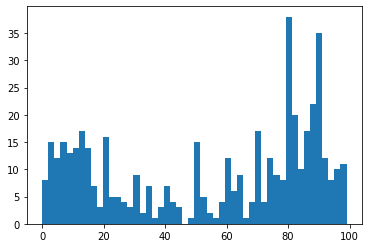

In [ ]:
import matplotlib.pyplot as plt
from statistics import *
plt.hist(df["VisITedResources"],bins = 50)
df["VisITedResources"].mean()

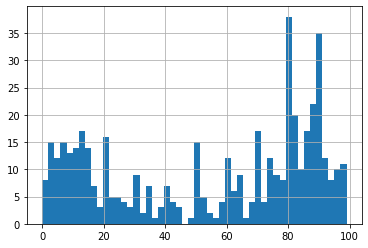

In [ ]:
import seaborn as sns
df.VisITedResources.hist(bins=50)

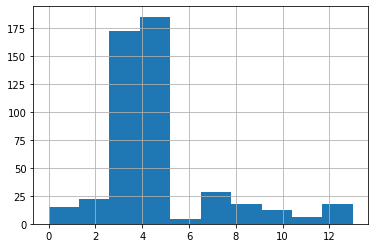

In [ ]:
df.NationalITy.hist()

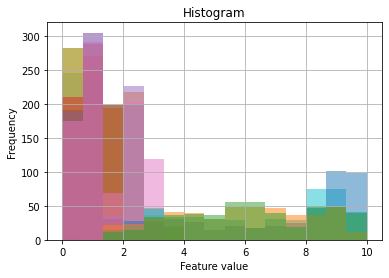

In [ ]:
# Select 5 columns and find out their bias 
df_pow = df.apply(np.sqrt)
df_pow.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

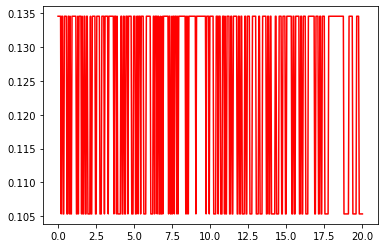

In [ ]:
import scipy.stats as stats 
param = stats.norm.fit(df_pow)
x = np.linspace(0, 20, 480)      # Linear spacing of 100 elements between 0 and 20.
pdf_fitted = stats.norm.pdf(df.gender, *param)
plt.plot(x, pdf_fitted, color='r')

## Step 5:
### Find out for all the variables which is their correlation with the class

Sometimes we need to reduce the ammount of features we feed the model in order to make it more lighweight, so we either select the best ones or take out the most useless ones.

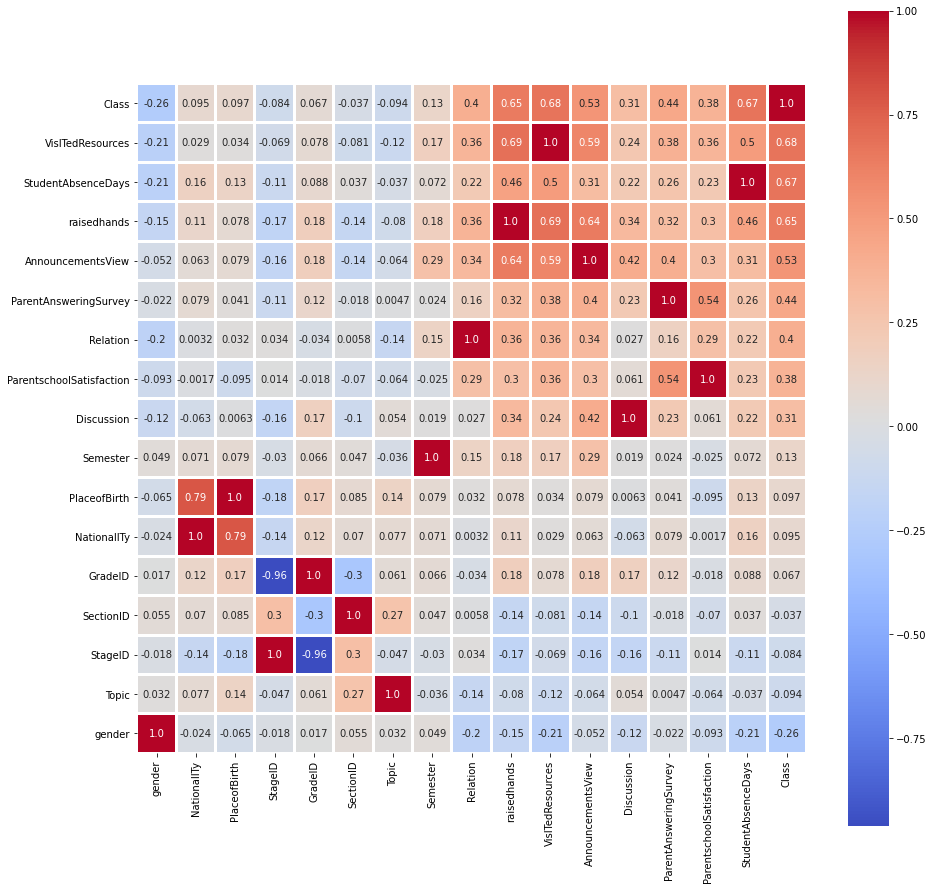

In [ ]:
corr = df.corr().sort_values(ascending = False, by = "Class")
plt.figure(figsize=(15, 15))
matrix = np.triu(df.corr())
sns.heatmap(corr,annot=True,fmt=".2",cmap= 'coolwarm',linewidths=2,square = True)

In [ ]:
# Select the top 4 most correlated and put them in a different dataset
df4 = df.filter(["gender","raisedhands","VisITedResources", "StudentAbsenceDays"], axis=1)
df2 = df.filter(["Relation","raisedhands","gender", "Topic"], axis=1)#take two most positive corr and most negative corr with class 
# Select the top 4 least correlated and create a new dataset without them
df3 = df.drop(["SectionID","StageID","GradeID","NationalITy"],axis =1) #drop 4 neasres value closest t osero
df4

,gender,raisedhands,VisITedResources,StudentAbsenceDays
0,1,15,16,1
1,1,20,20,1
2,1,10,7,0
3,1,30,25,0
4,1,40,50,0
...,...,...,...,...
475,0,5,4,0
476,0,50,77,1
477,0,55,74,1
478,0,30,17,0


## Step 6:
### Visualize the correlation between the previously selected 4 most correlated variables with the class

Lets see if those are correlated too.


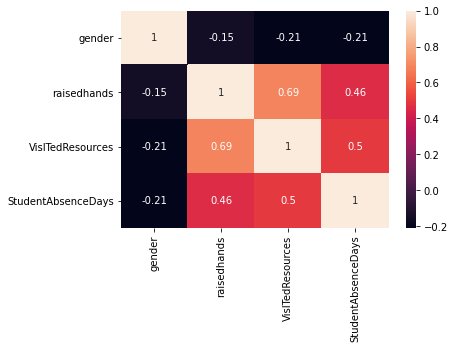

In [ ]:
# Plot the correlation among themself for the previous 4 variables.
sns.heatmap(df4.corr(),annot= True)

## Step 7:
### For the previoys 4 variables plot them AGAINST the class


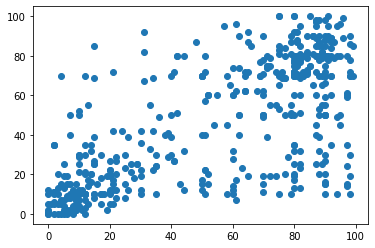

In [ ]:
# make 4 plot where you plot each of the variables with the class
#plt.scatter(df["Class"],df2["raisedhands"])
plt.scatter(df["VisITedResources"],df["raisedhands"])

In [ ]:
k  = df.loc[df["StudentAbsenceDays"] == 1 ]
k.loc[k["Class"] == 0].size

187

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as L

In [ ]:
import collections
hey = np.logical_and((df["StudentAbsenceDays"] == 1).values , (df["Class"] == 0).values)
collections.Counter(hey)

Counter({False: 469, True: 11})

In [ ]:
#df.loc[df["StudentAbsenceDays"] == 1 & df["Class"] == 1] ??????
#probablity of absent less than 7 is  u7 days = 1 a7days = 0 class h = 0 m = 2 l = 1
df["StudentAbsenceDays"].value_counts()

1    289
0    191
Name: StudentAbsenceDays, dtype: int64

In [ ]:
df["Class"].value_counts()#127/480

2    211
0    142
1    127
Name: Class, dtype: int64

In [ ]:
u7l = (127/480)*(289/480)
u7l

0.15930121527777777

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as m or higher, using the previous calculation

In [ ]:
# Looking at step seven extrapolate from it the probability of a student being classified as M or H
u7mh = 1-u7l
u7mh


0.8406987847222223

## Step 9:
### Probability time, knowing a student was classified as H, what is the probability of him having raised the hand more than 10 times

In [ ]:
df.loc[df["Class"]== 2].count()

gender                      142
NationalITy                 142
PlaceofBirth                142
StageID                     142
GradeID                     142
SectionID                   142
Topic                       142
Semester                    142
Relation                    142
raisedhands                 142
VisITedResources            142
AnnouncementsView           142
Discussion                  142
ParentAnsweringSurvey       142
ParentschoolSatisfaction    142
StudentAbsenceDays          142
Class                       142
dtype: int64

In [ ]:
# number of H 142

heyy = np.logical_and((df["raisedhands"] > 10).values , (df["Class"] == 0).values)
collections.Counter(heyy)
141/480

0.29375

## Step 10:
### Free time, if I was the principal of the school what plots and probabilities would you show me to help me accept only M and H students.

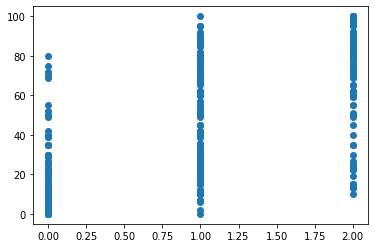

In [ ]:
plt.scatter(df["Class"],df["raisedhands"])

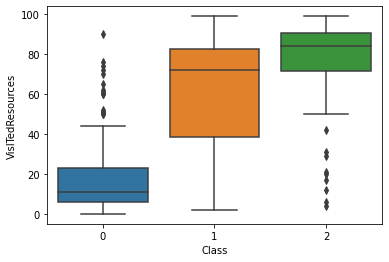

In [ ]:
sns.boxplot(x="Class", y="VisITedResources", data=dff)

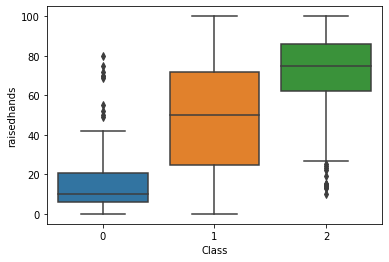

In [ ]:
sns.boxplot(x="Class", y="raisedhands", data=dff)

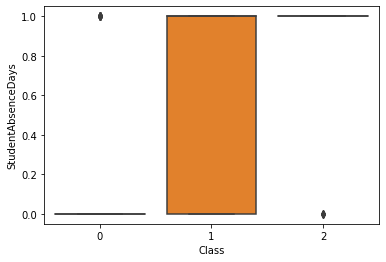

In [ ]:
sns.boxplot(x= "Class",y= "StudentAbsenceDays",data = dff)

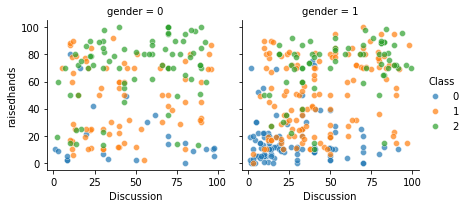

In [ ]:
g = sns.FacetGrid(dff, col="gender", hue="Class")
g.map(sns.scatterplot, "Discussion", "raisedhands", alpha=.7)
g.add_legend()

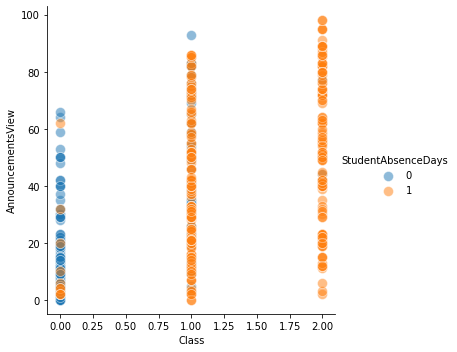

In [ ]:
#pal = list( 1="seagreen", 0=".7")
g = sns.FacetGrid(dff, hue="StudentAbsenceDays", height=5)
g.map(sns.scatterplot, "Class", "AnnouncementsView", s=100, alpha=.5)
g.add_legend()

for multile scatter plots use that
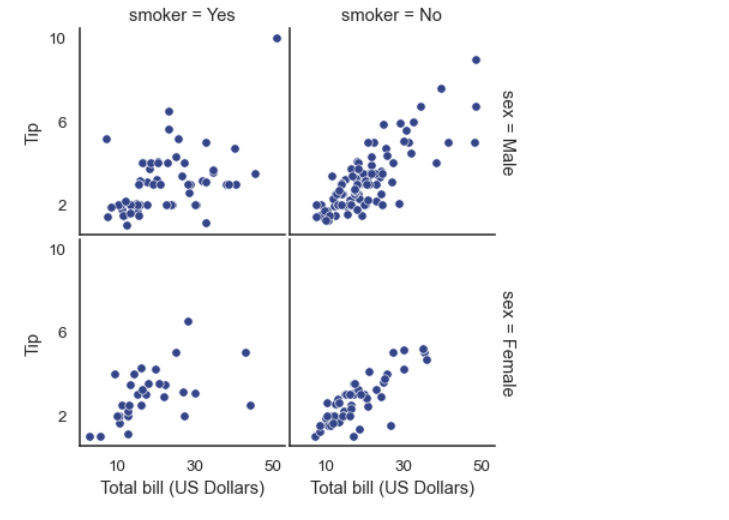

In [ ]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "total_bill", "tip", color="#334488")
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=.02, hspace=.02)